
### <font color='blue'>Contexto</font> 

Elizabeth II (Elizabeth Alexandra Mary; 21 de abril de 1926 - 8 de setembro de 2022) foi rainha do Reino Unido e outros reinos da Commonwealth de 6 de fevereiro de 1952 até sua morte em 2022.

Ela foi rainha reinante de 32 estados soberanos diferentes no curso de seu reinado e serviu como monarca de 15 deles no momento de sua morte.

Seu reinado de 70 anos e 214 dias é o mais longo de qualquer monarca britânico e o mais longo registrado de qualquer chefe de Estado. - Wikipédia

### <font color='blue'>Objectivo da Analise</font>

Nesta análise teremos 2 datasets contendo tweets brutos, gerados segundos apos o anúncio da morte da rainha Elizabeth II, os tweets foram coletados por um período de 2 horas logo apos o anuncio da Morte da Rainha.

O primeiro dataset *queens_death_tweets.csv* contem *36910* tweets pesquisados com a palavra chave *Rainha Elizabeth*, e o segundo dataset *king_charles_tweets.csv* contem *51688* tweets pesquisados com a palavra chave *Rei Carlos*.

O objetivo desta análise é de saber qual foi a reação das pessoas em diferentes partes do mundo logo apos o anúncio da morte da rainha Elisabeth II. 

### <font color='blue'>Descrição das Variaveis Usadas na Analise</font>

* **Data** - o dia que o tweet foi postado.

* **Hora** - A hora que o tweet foi postado.

* **username**- O  nome do usuario que postou o tweet.

* **Tweet**- O que foi postado pelo usuario.

* **Language**- A lingua usada para postar o tweet.

* **replies_count**- O numero total de replies do tweet.

* **retweets_count**- O numero total de retweets do tweet.

* **likes_count**- O numero total de likes do tweet.


### <font color='blue'> Importando as bibliotecas que serão usadas na analise </font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
import os
from os import path

In [2]:
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from collections import defaultdict,Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string
import re
stop=set(stopwords.words('english'))
stopt=set(stopwords.words('portuguese'))


## <font color='blue'> Parte1: Queens_death_tweets Analisy </font>

In [3]:
queens = pd.read_csv("queens_death_tweets.csv",encoding='utf8')

In [4]:
queens.shape

(36910, 36)

In [5]:
queens.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1568054268233654273,1568054268233654273,2022-09-09 01:50:45 UTC,2022-09-09,01:50:45,0,1470288208302772227,sikarwarrr,Kalpanasourabhsingh,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
1,1568054267025539072,1568054267025539072,2022-09-09 01:50:44 UTC,2022-09-09,01:50:44,0,214331711,cello5150,Cello From Antigua 🇦🇬 #️⃣NSG,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
2,1568054264467001347,1568054264467001347,2022-09-09 01:50:44 UTC,2022-09-09,01:50:44,0,1358234971576688645,mariabisagra,María Bisagra,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
3,1568054263875764225,1568054263875764225,2022-09-09 01:50:44 UTC,2022-09-09,01:50:44,0,831041036,muffinshalo,Muffins Halo,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
4,1568054263712030721,1568054263712030721,2022-09-09 01:50:44 UTC,2022-09-09,01:50:44,0,1507459039181033485,thouspectator,spectating_bazinga,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN


# Seleção das Colunas que serão usadas na Analise

In [6]:
queens.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [7]:
dfqueen = queens[['date','time','tweet','language','replies_count','retweets_count','likes_count']]

In [8]:
dfqueen.head(5)

,date,time,tweet,language,replies_count,retweets_count,likes_count
0,2022-09-09,01:50:45,RIP..queen Elizabeth..\nBut ab hmara kohinoor ...,en,0,0,0
1,2022-09-09,01:50:44,Queen Elizabeth when she gets to heaven &amp; ...,en,0,0,0
2,2022-09-09,01:50:44,#QueenElizabeth #ReinaIsabel #ElRechazoTeMinti...,qme,0,0,0
3,2022-09-09,01:50:44,Her Majesty the Queen. \nMay your soul reunite...,en,0,0,0
4,2022-09-09,01:50:44,"another day, another thing to spectate. this t...",en,0,0,0


# Definindo os tipos de dados corretos as variáveis

In [9]:
dfqueen.dtypes

date              object
time              object
tweet             object
language          object
replies_count      int64
retweets_count     int64
likes_count        int64
dtype: object

In [10]:
dfqueen['date'] = pd.to_datetime(dfqueen['date'])
dfqueen['tweet']=dfqueen['tweet'].astype(str)

In [11]:
dfqueen.dtypes

date              datetime64[ns]
time                      object
tweet                     object
language                  object
replies_count              int64
retweets_count             int64
likes_count                int64
dtype: object

# Limpeza de dados

<AxesSubplot:>

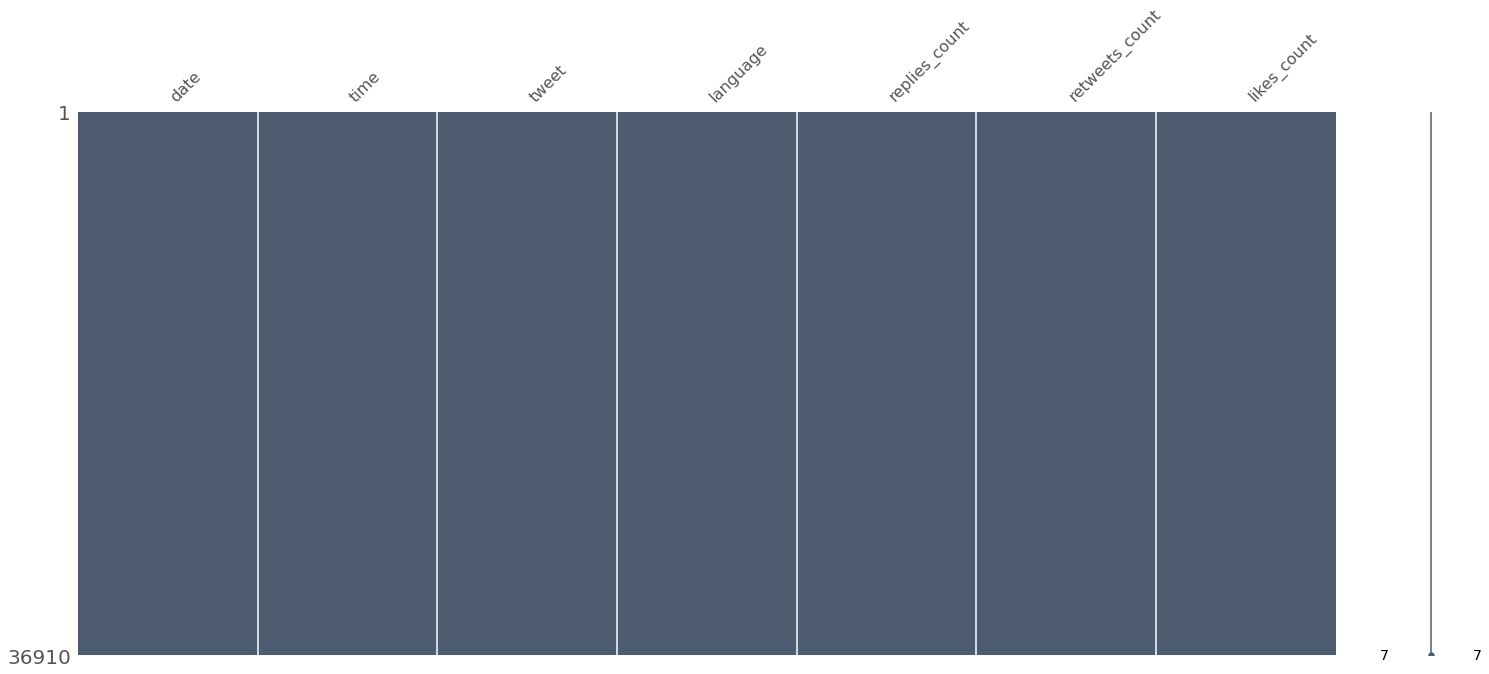

In [12]:
import missingno as msno
msno.matrix(dfqueen,color=(0.3,0.36,0.44))

# <font color='red'> Filtrando os Tweets de Lingua Inglesa </font>

In [13]:
dfqueen['language'].value_counts()

en     29358
es      1682
cy       946
in       871
qme      756
und      557
ja       435
tl       321
pt       295
th       274
qht      234
ar       182
tr       181
fr       149
hi       130
it        79
de        70
zh        53
ta        47
el        31
ht        29
fa        28
fi        22
ca        22
nl        22
ur        17
pl        16
ko        12
et         9
mr         8
ml         6
te         6
ne         6
sl         6
sv         5
zxx        5
gu         4
pa         4
ro         4
eu         4
si         3
ru         3
qam        3
is         2
da         2
or         2
vi         1
my         1
uk         1
lt         1
kn         1
hu         1
bn         1
lv         1
ckb        1
Name: language, dtype: int64

In [14]:
dfqueenEn = dfqueen[(dfqueen.language == 'en')]

In [15]:
dfqueenEn.shape

(29358, 7)

### Filtrando as palavras irrelevantes comuns nos tweets

In [16]:
def create_corpus(target):
    corpus=[]
    
    for x in dfqueen[dfqueen['language']==target ]['tweet'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [17]:
np.array(stop)

array({'because', 'his', 'there', 'with', 'in', 'under', "you'd", "hasn't", 'than', 'shan', 'herself', "should've", 'off', 'being', 'we', 'nor', 'out', 'once', 'are', 'for', 'most', 'weren', 'o', 'about', 're', 'have', 'only', 'had', 've', 'to', 'just', "wouldn't", 'don', 'too', 'am', "needn't", "didn't", "shouldn't", 'any', 'each', 'other', 'some', 'didn', 'him', 'hadn', 'it', 'she', 'yourselves', 'is', 'here', 'wasn', "she's", 'needn', 'below', 'doing', 'll', 'them', 'aren', 'on', 'these', 'yours', "wasn't", 'theirs', 'of', "shan't", 'couldn', 'your', 'own', 'ourselves', "aren't", 'above', 'd', "doesn't", "haven't", 'did', 'were', 'few', 'itself', "mustn't", 'those', 'that', "that'll", 'before', 'mustn', 'as', 'themselves', 'or', 'which', 'you', 'doesn', "won't", 'our', "couldn't", 'during', 'while', 'from', "isn't", 'more', 'between', "hadn't", "you've", 'why', 'until', 'shouldn', 'he', 'do', 'hers', 'but', 'been', 'down', 'all', 'm', 'haven', 'won', 'then', 'her', 'should', 'their'

<BarContainer object of 10 artists>

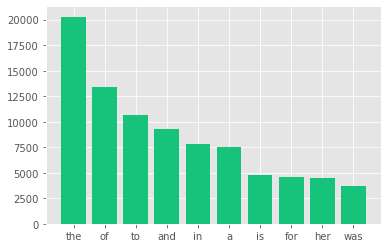

In [18]:
corpus=create_corpus("en")

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1     
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#17C37B')

## Filtrando as pontuações comuns nos tweets

<BarContainer object of 26 artists>

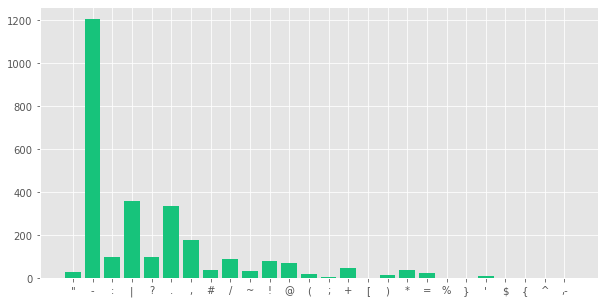

In [19]:
plt.figure(figsize=(10,5))
corpus=create_corpus("en")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='#17C37B')

## Filtrando as palavras comuns nos tweets

In [20]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

<AxesSubplot:>

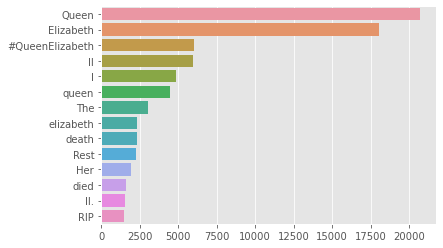

In [21]:
sns.barplot(x=y,y=x)

#  Pre-processamento e Limpeza 

In [22]:
dfqueenEn.columns

Index(['date', 'time', 'tweet', 'language', 'replies_count', 'retweets_count',
       'likes_count'],
      dtype='object')

### Removendo as Urls e links HTML

In [23]:
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)
dfqueenEn['tweet_new']=dfqueenEn['tweet'].apply(lambda x:remove_urls(x))

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
dfqueenEn['tweet']=dfqueenEn['tweet_new'].apply(lambda x:remove_html(x))

### Convertendo os tweets para letras minusculas e Removendo os numeros

In [24]:
def lower(text):
    low_text= text.lower()
    return low_text
dfqueenEn['tweet_new']=dfqueenEn['tweet'].apply(lambda x:lower(x))


def remove_num(text):
    remove= re.sub(r'\d+', '', text)
    return remove
dfqueenEn['tweet']=dfqueenEn['tweet_new'].apply(lambda x:remove_num(x))

### Removendo as stopwords e pontuações

In [25]:
#Remove stopwords & Punctuations
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

def punct_remove(text):
    punct = re.sub(r"[^\w\s\d]","", text)
    return punct
dfqueenEn['tweet_new']=dfqueenEn['tweet'].apply(lambda x:punct_remove(x))



def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dfqueenEn['tweet']=dfqueenEn['tweet_new'].apply(lambda x:remove_stopwords(x))

### Removendo as Menções  e hashtags

In [26]:
def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text
dfqueenEn['tweet_new']=dfqueenEn['tweet'].apply(lambda x:remove_mention(x))
def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text
dfqueenEn['tweet']=dfqueenEn['tweet_new'].apply(lambda x:remove_hash(x))


### Removendo o espaço em branco deixado apos a remoção dos palavras irrelevantes, pontuações(….)

In [27]:
def remove_space(text):
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove
dfqueenEn['tweet_new']=dfqueenEn['tweet'].apply(lambda x:remove_space(x))

dfqueenEn = dfqueenEn.drop(columns=['tweet_new'])

### Exibindo a Tabela Processada 

In [28]:
dfqueenEn.head(5)

,date,time,tweet,language,replies_count,retweets_count,likes_count
0,2022-09-09,01:50:45,ripqueen elizabeth ab hmara kohinoor dedo quee...,en,0,0,0
1,2022-09-09,01:50:44,queen elizabeth gets heaven amp realizes surro...,en,0,0,0
3,2022-09-09,01:50:44,majesty queen may soul reunite loved today sad...,en,0,0,0
4,2022-09-09,01:50:44,another day another thing spectate time specta...,en,0,0,0
5,2022-09-09,01:50:43,deepestcondolences mourning loss late amp dear...,en,0,0,0


## Palavras mas usadas pelos Usuarios

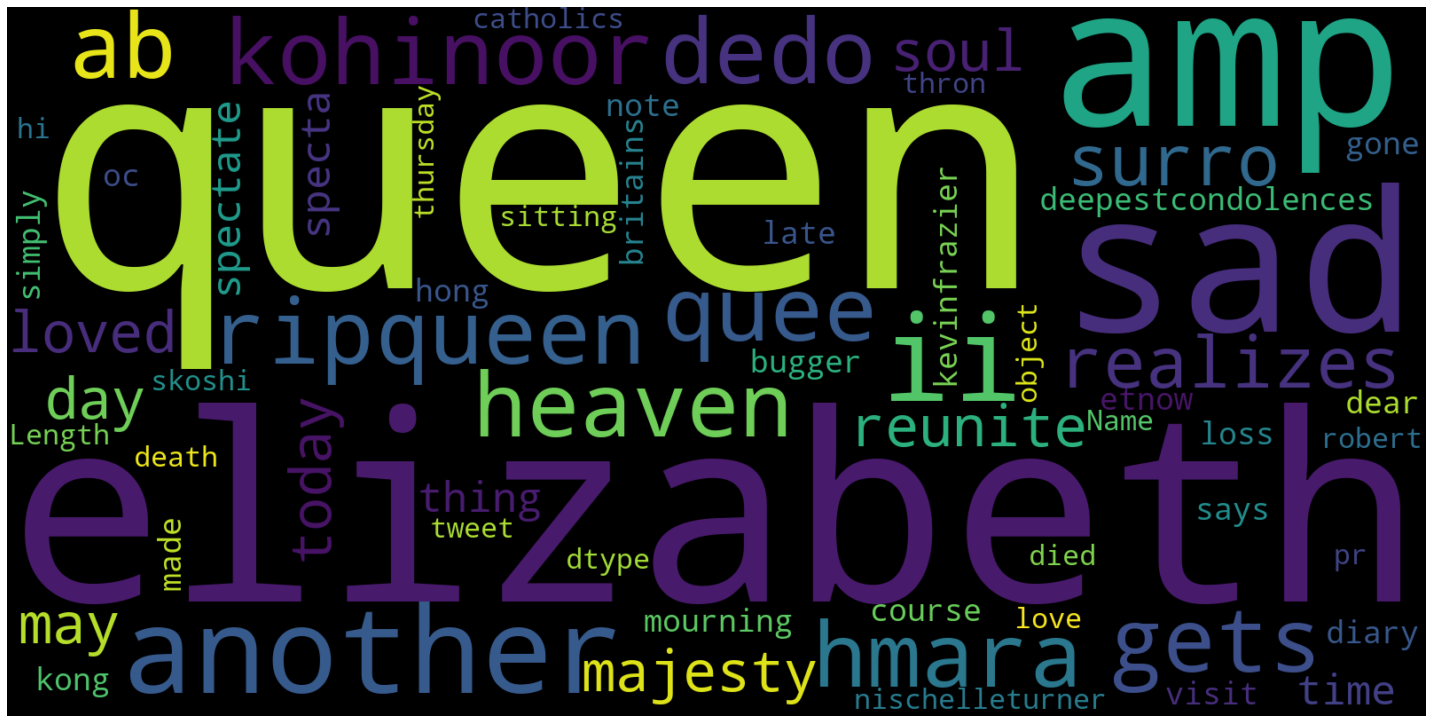

In [29]:
text = str(dfqueenEn['tweet'])
plt.figure(figsize = (20,20))
wc = WordCloud(min_font_size = 3 , width = 1600 , height = 800 )
wc.generate(text)
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off');
plt.tight_layout()  

## Top 15 Reações Apos o Anúncio da Morte da Rainha Elisabeth II

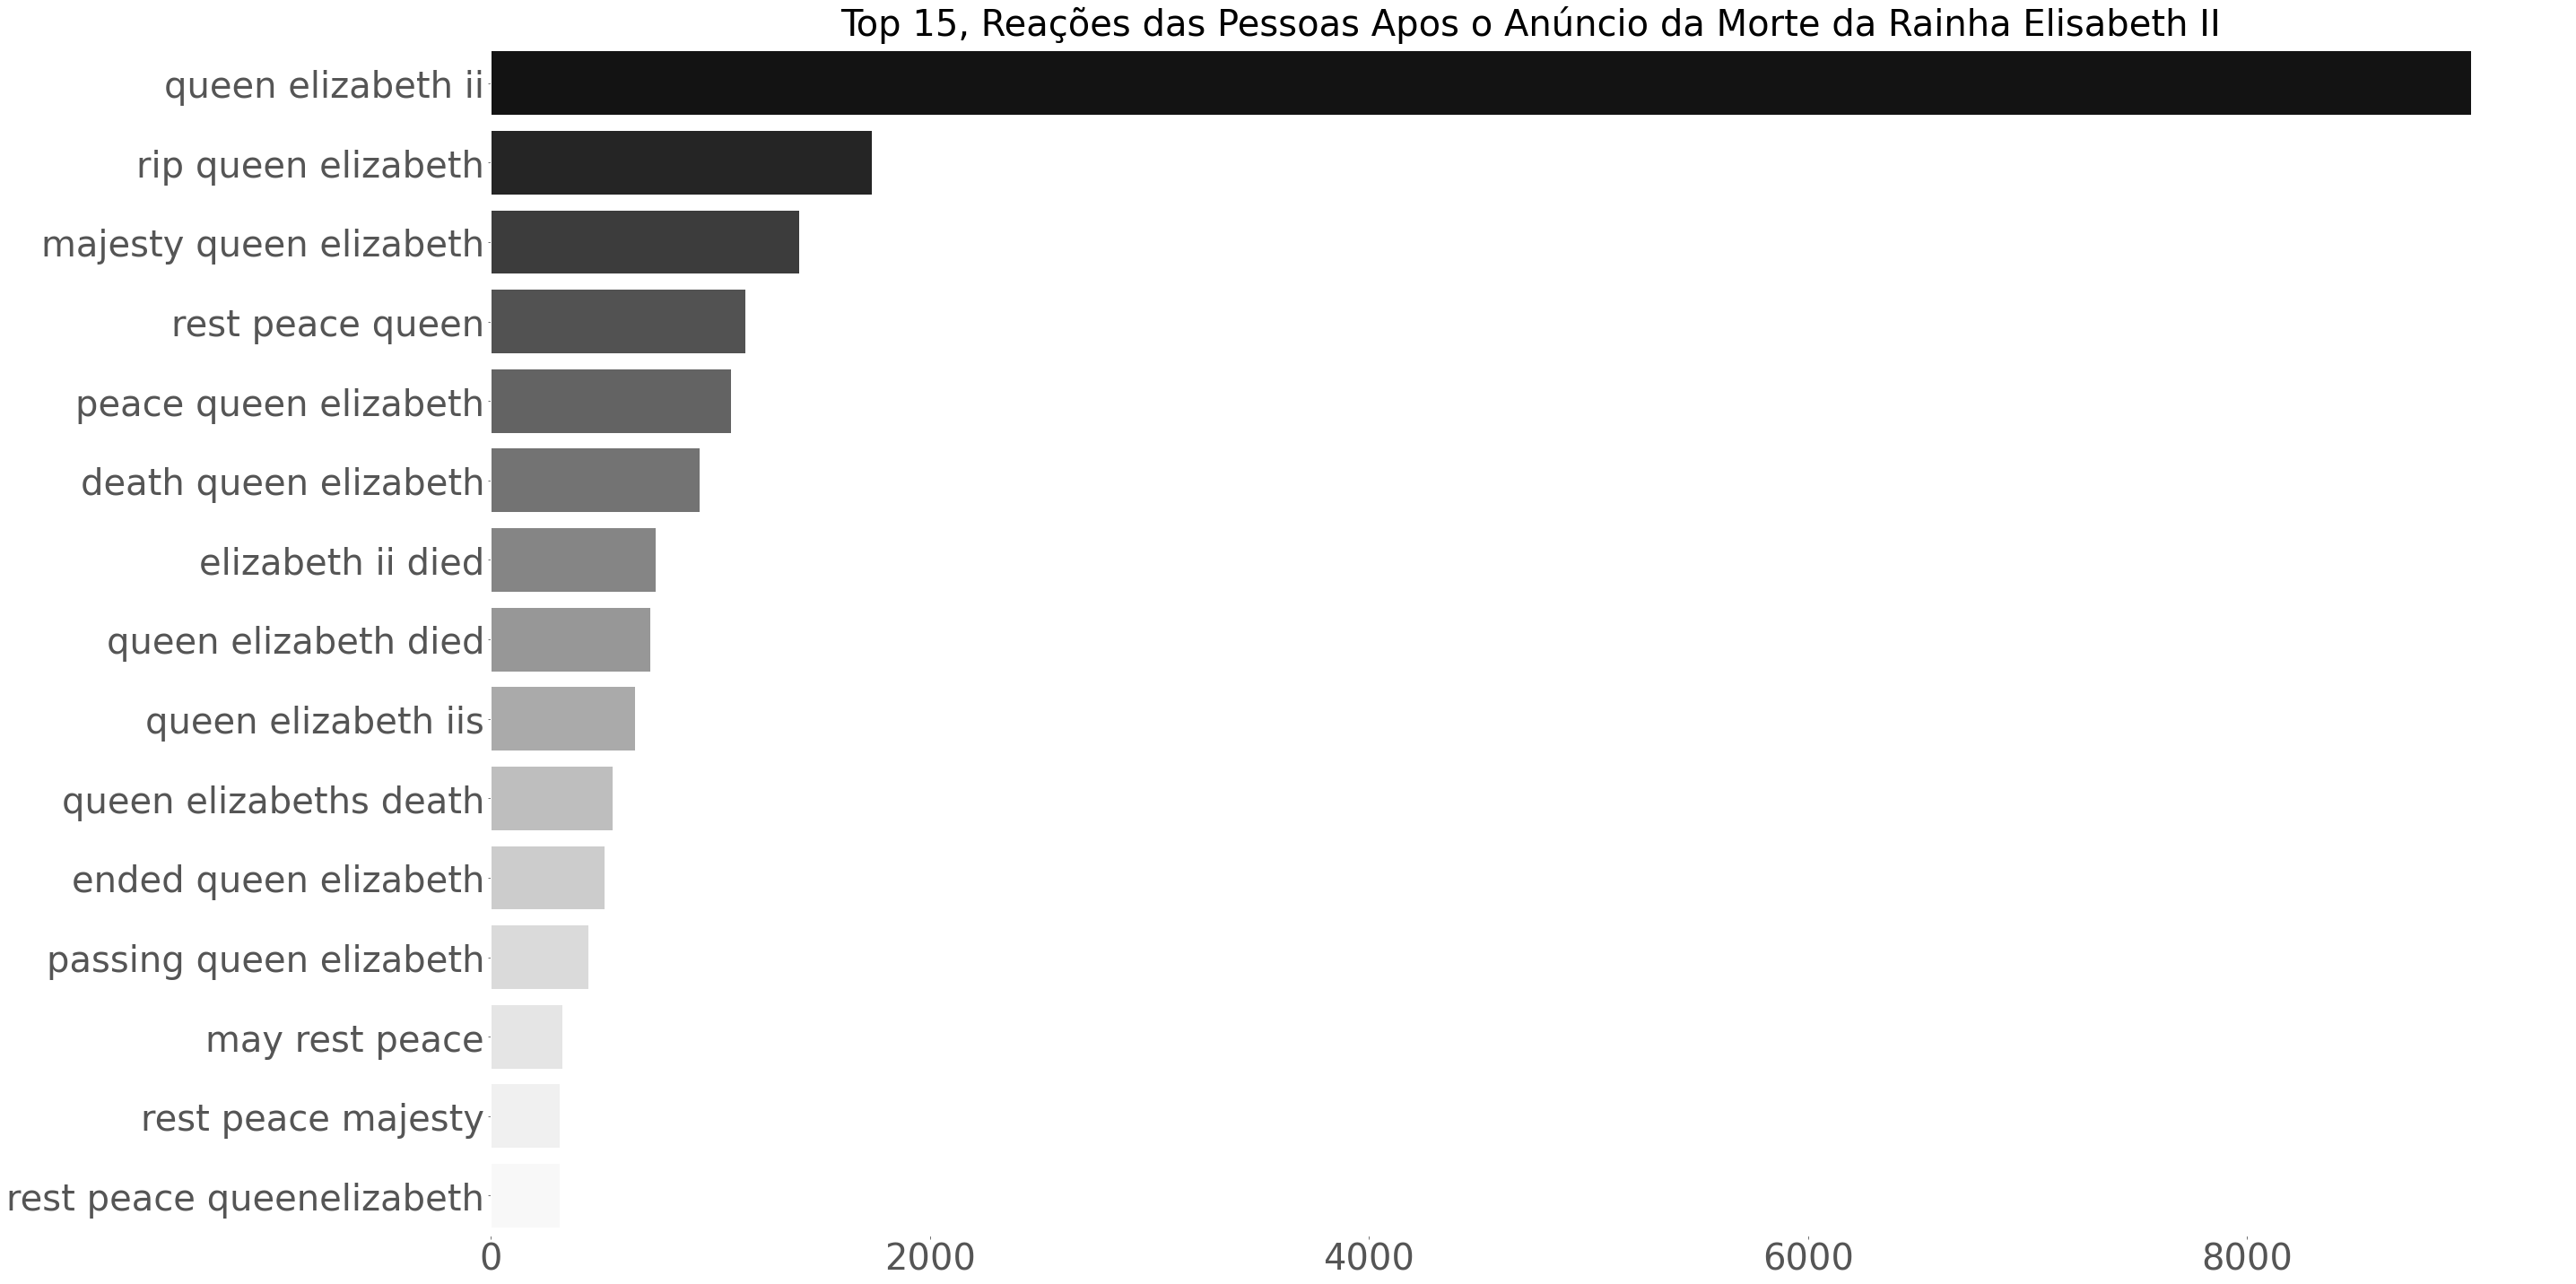

In [30]:
# Define functions
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 15




sentimento = defaultdict(int)



# Unigrams
for tweet in dfqueenEn['tweet']:
    for word in generate_ngrams(tweet, n_gram=3):
        sentimento[word] += 1
        

        
df_sentimento = pd.DataFrame(sorted(sentimento.items(), key=lambda x: x[1])[::-1])



fig, axes = plt.subplots(figsize=(40, 20))
plt.tight_layout()

sns.barplot(y=df_sentimento[0].values[:N], x=df_sentimento[1].values[:N], palette = 'Greys_r')

axes.spines['right'].set_visible(False)
axes.set_xlabel('')
axes.set_ylabel('')
axes.tick_params(axis='x', labelsize=40)
axes.tick_params(axis='y', labelsize=40)
axes.set_facecolor('white')

axes.set_title(f'Top {N}, Reações das Pessoas Apos o Anúncio da Morte da Rainha Elisabeth II', fontsize=40)
plt.tight_layout()

plt.show()

# <font color='green'> Filtrando os Tweets de Lingua Portuguesa </font>

In [31]:
dfqueenPt = dfqueen[(dfqueen.language == 'pt')]

In [32]:
dfqueenPt.shape

(295, 7)

## Filtrando as palavras irrelevantes mas comuns nos tweets

In [33]:
def criar_corpo(target):
    corpo=[]
    
    for x in dfqueen[dfqueen['language']==target ]['tweet'].str.split():
        for i in x:
            corpo.append(i)
    return corpo

In [34]:
np.array(stopt)

array({'dele', 'às', 'está', 'delas', 'fôramos', 'aquilo', 'hajamos', 'seu', 'tivessem', 'é', 'era', 'fôssemos', 'seria', 'ser', 'aqueles', 'minha', 'estivemos', 'da', 'temos', 'seremos', 'dela', 'tivéramos', 'fomos', 'aquele', 'entre', 'já', 'ela', 'por', 'à', 'for', 'para', 'o', 'também', 'estivéssemos', 'pelos', 'teu', 'mesmo', 'eu', 'suas', 'teve', 'houveriam', 'sua', 'você', 'te', 'será', 'pela', 'meus', 'tuas', 'muito', 'até', 'estávamos', 'tenham', 'ao', 'aos', 'estiveram', 'nem', 'vocês', 'sem', 'tínhamos', 'fossem', 'teriam', 'vos', 'houvesse', 'este', 'tua', 'que', 'hajam', 'lhes', 'numa', 'tivéssemos', 'serão', 'tém', 'esses', 'houvessem', 'nosso', 'qual', 'essa', 'os', 'quem', 'se', 'teríamos', 'esta', 'tem', 'tenhamos', 'houvera', 'estes', 'somos', 'essas', 'tive', 'estivermos', 'pelas', 'houveria', 'tiver', 'estavam', 'hei', 'mais', 'como', 'estejam', 'isto', 'nossa', 'as', 'estiver', 'houverão', 'estar', 'houveríamos', 'haja', 'nossos', 'houvermos', 'houvemos', 'houverá'

<BarContainer object of 10 artists>

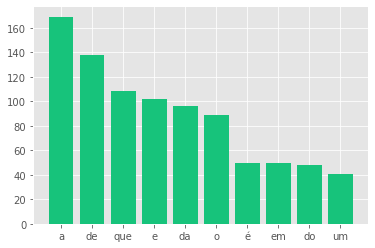

In [35]:
corpo=criar_corpo("pt")

dic=defaultdict(int)
for word in corpo:
    if word in stopt:
        dic[word]+=1     
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#17C37B')

## Filtrando as pontuações mas comuns nos tweets

<BarContainer object of 9 artists>

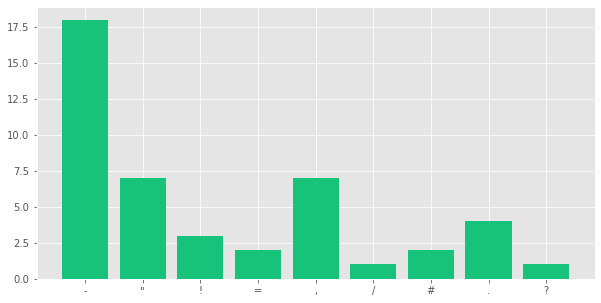

In [36]:
plt.figure(figsize=(10,5))
corpo=criar_corpo("pt")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpo):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='#17C37B')

## Filtrando as palavras mas comuns nos tweets

In [37]:
counter=Counter(corpo)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:20]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

<AxesSubplot:>

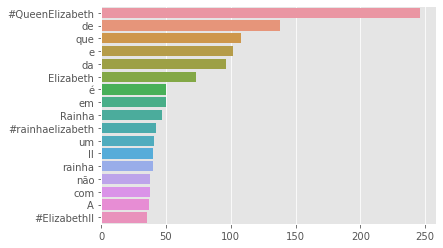

In [38]:
sns.barplot(x=y,y=x)

#  Pre-processamento e Limpeza 

### Removendo as Urls e links HTML

In [39]:
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)
dfqueenPt['tweet_new']=dfqueenPt['tweet'].apply(lambda x:remove_urls(x))

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
dfqueenPt['tweet']=dfqueenPt['tweet_new'].apply(lambda x:remove_html(x))

### Convertendo os tweets para letras minusculas e Removendo os numeros

In [40]:
def lower(text):
    low_text= text.lower()
    return low_text
dfqueenPt['tweet_new']=dfqueenPt['tweet'].apply(lambda x:lower(x))



def remove_num(text):
    remove= re.sub(r'\d+', '', text)
    return remove
dfqueenPt['tweet']=dfqueenPt['tweet_new'].apply(lambda x:remove_num(x))

### Removendo as stopwords e pontuações

In [41]:
from nltk.corpus import stopwords
", ".join(stopwords.words('portuguese'))
STOPWORDS = set(stopwords.words('portuguese'))

def punct_remove(text):
    punct = re.sub(r"[^\w\s\d]","", text)
    return punct
dfqueenPt['tweet_new']=dfqueenPt['tweet'].apply(lambda x:punct_remove(x))



def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dfqueenPt['tweet']=dfqueenPt['tweet_new'].apply(lambda x:remove_stopwords(x))

### Removendo as Menções  e hashtags

In [42]:
def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text
dfqueenPt['tweet_new']=dfqueenPt['tweet'].apply(lambda x:remove_mention(x))

def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text
dfqueenPt['tweet']=dfqueenPt['tweet_new'].apply(lambda x:remove_hash(x))


### Removendo o espaço em branco deixado apos a remoção dos palavras irrelevantes, pontuações(….)

In [43]:
def remove_space(text):
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove
dfqueenPt['tweet_new']=dfqueenPt['tweet'].apply(lambda x:remove_space(x))

dfqueenPt = dfqueenPt.drop(columns=['tweet_new'])

### Exibindo a Tabela Processada 

In [44]:
dfqueenPt.head(5)

,date,time,tweet,language,replies_count,retweets_count,likes_count
34,2022-09-09,01:50:39,luto rainha elizabeth ii queenelizabeth queene...,pt,0,0,0
680,2022-09-09,01:48:30,queenelizabeth sentimentos deus salve rainha r...,pt,0,0,0
857,2022-09-09,01:47:59,betinha sempre lembrada queenelizabeth,pt,0,0,0
1049,2022-09-09,01:47:23,luitimbs owm homi deixa pobi cumpadi charles r...,pt,1,0,0
1492,2022-09-09,01:45:55,rainha reino unido morreu mim tias embora cont...,pt,0,0,0


## Palavras mas usadas pelos Usuarios

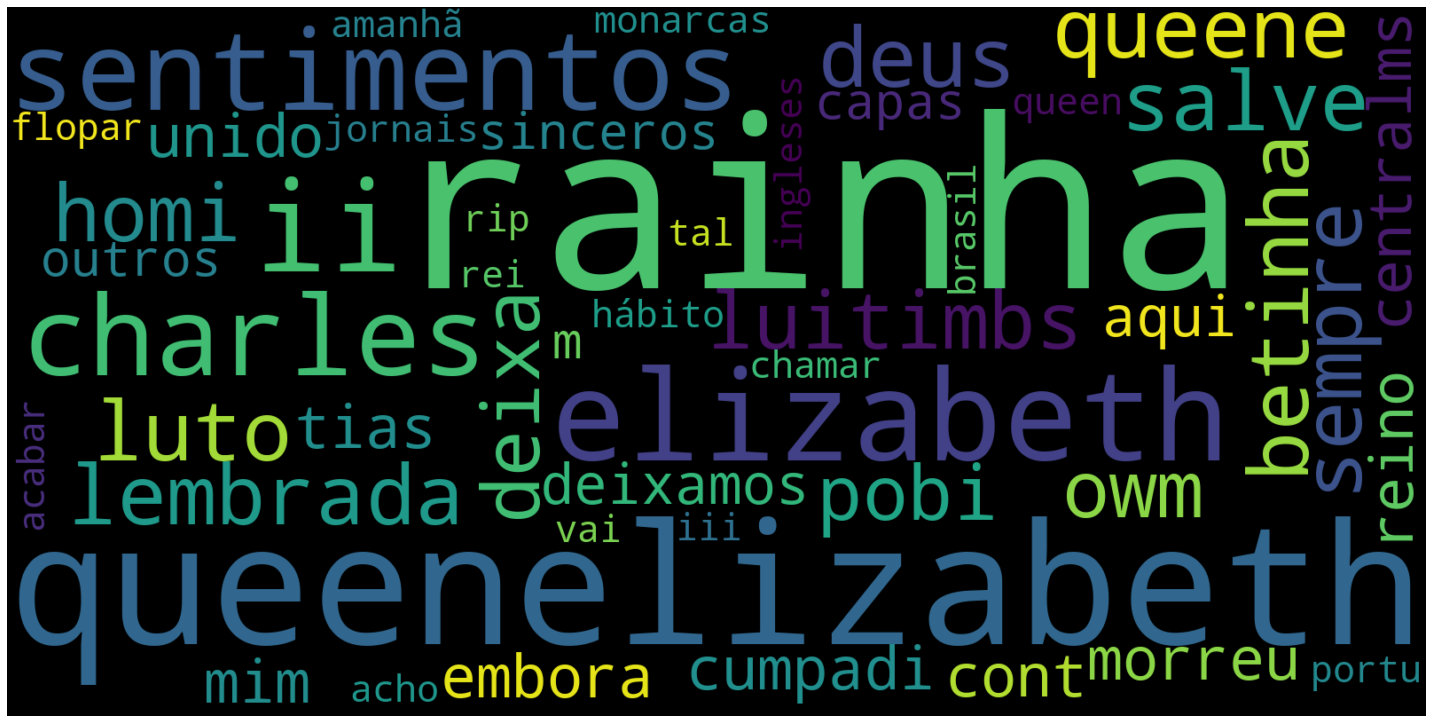

In [45]:
textpt= str(dfqueenPt['tweet']) 
plt.figure(figsize = (20,20))
wc = WordCloud(min_font_size = 3,  max_words = 50 , width = 1600 , height = 800 )
wc.generate(textpt)
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off');
plt.tight_layout()  

## Top 15 Reações Apos o Anúncio da Morte da Rainha Elisabeth II

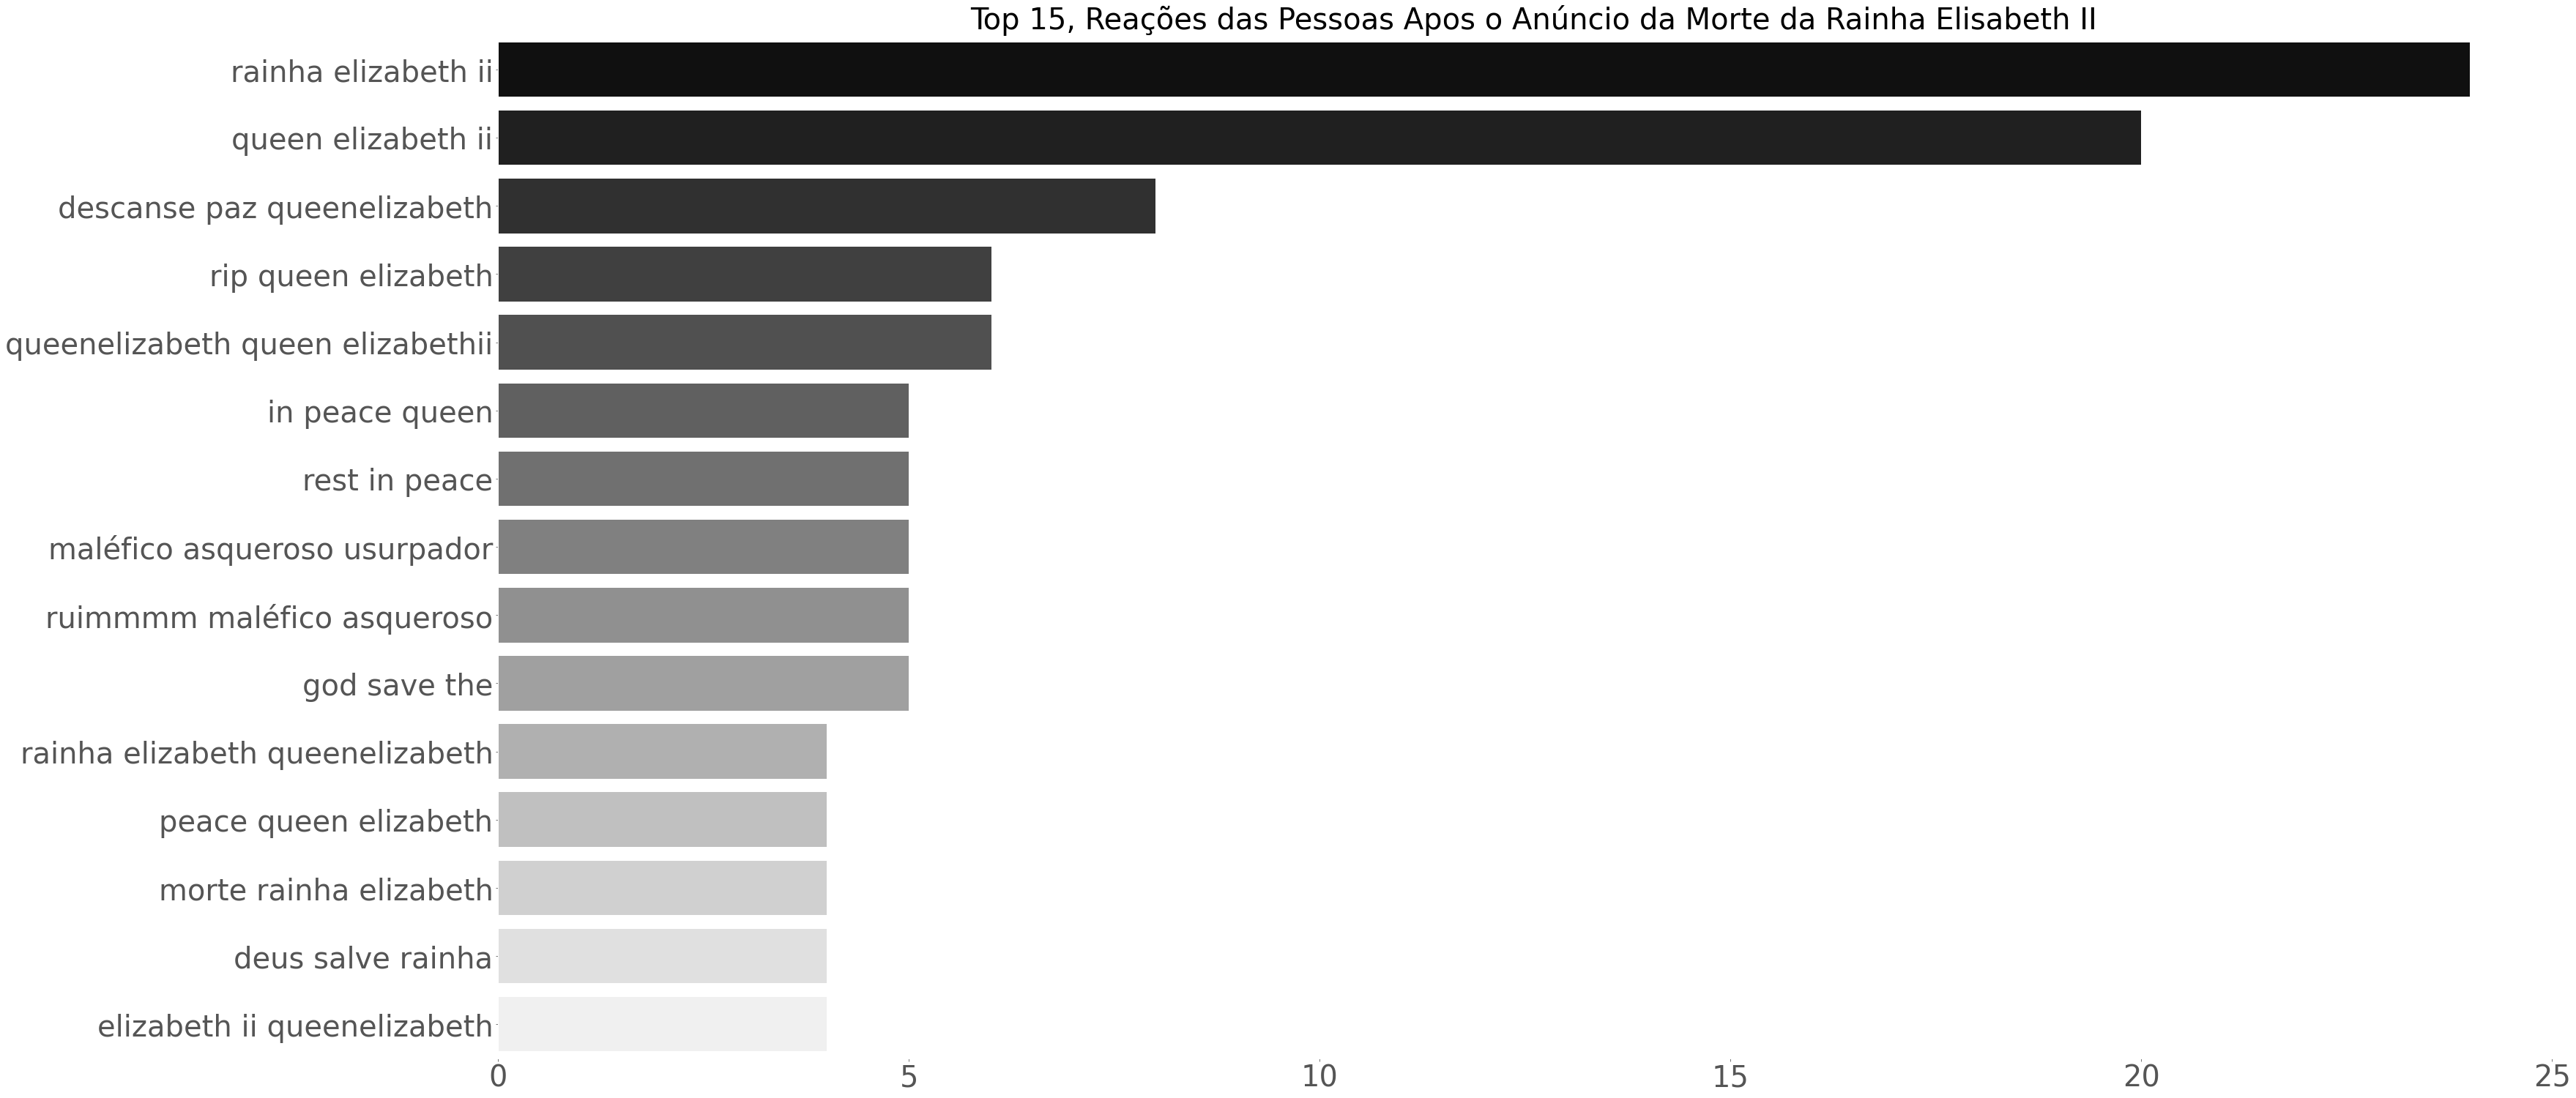

In [46]:
# Define functions
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 15




sentimento = defaultdict(int)



# Unigrams
for tweet in dfqueenPt['tweet']:
    for word in generate_ngrams(tweet, n_gram=3):
        sentimento[word] += 1
        

        
df_sentimento = pd.DataFrame(sorted(sentimento.items(), key=lambda x: x[1])[::-1])



fig, axes = plt.subplots(figsize=(40, 20))
plt.tight_layout()

sns.barplot(y=df_sentimento[0].values[:N], x=df_sentimento[1].values[:N], palette = 'gist_gray')



axes.spines['right'].set_visible(False)
axes.set_xlabel('')
axes.set_ylabel('')
axes.tick_params(axis='x', labelsize=40)
axes.tick_params(axis='y', labelsize=40)
axes.set_facecolor('white')

axes.set_title(f'Top {N}, Reações das Pessoas Apos o Anúncio da Morte da Rainha Elisabeth II', fontsize=40)


plt.show()

# <font color='blue'> Parte 2: king_charles_tweets Analisys </font>

In [47]:
king = pd.read_csv("king_charles_tweets.csv",encoding='utf8')

In [48]:
queens.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1568054268233654273,1568054268233654273,2022-09-09 01:50:45 UTC,2022-09-09,01:50:45,0,1470288208302772227,sikarwarrr,Kalpanasourabhsingh,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
1,1568054267025539072,1568054267025539072,2022-09-09 01:50:44 UTC,2022-09-09,01:50:44,0,214331711,cello5150,Cello From Antigua 🇦🇬 #️⃣NSG,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
2,1568054264467001347,1568054264467001347,2022-09-09 01:50:44 UTC,2022-09-09,01:50:44,0,1358234971576688645,mariabisagra,María Bisagra,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
3,1568054263875764225,1568054263875764225,2022-09-09 01:50:44 UTC,2022-09-09,01:50:44,0,831041036,muffinshalo,Muffins Halo,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
4,1568054263712030721,1568054263712030721,2022-09-09 01:50:44 UTC,2022-09-09,01:50:44,0,1507459039181033485,thouspectator,spectating_bazinga,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN


## Seleção das Colunas que serão usadas na Analise

In [49]:
king.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [50]:
dfking = king[['date','time','tweet','language','replies_count','retweets_count','likes_count']]

In [51]:
dfking.head(5)

,date,time,tweet,language,replies_count,retweets_count,likes_count
0,2022-09-09,02:57:51,@andylines God supports the ascension of King ...,en,0,0,0
1,2022-09-09,02:57:49,"[9-9-2022] 英女王伊利沙伯二世逝世 享年96歲… 查理斯繼位, 成為英王查理斯三世...",ja,0,0,0
2,2022-09-09,02:57:36,King Charles III ni kalau ikutkan laporan medi...,in,0,0,0
3,2022-09-09,02:57:36,It is funny to think how the UK tabloids keep ...,en,1,0,0
4,2022-09-09,02:57:32,"Based on the Led Zeppelin Scale, King Charles ...",en,0,1,0


## Definindo os tipos de dados corretos as variáveis

In [52]:
dfking.dtypes

date              object
time              object
tweet             object
language          object
replies_count      int64
retweets_count     int64
likes_count        int64
dtype: object

In [53]:
dfking['date'] = pd.to_datetime(dfking['date'])
dfking['tweet']=dfking['tweet'].astype(str)

In [54]:
dfking.dtypes

date              datetime64[ns]
time                      object
tweet                     object
language                  object
replies_count              int64
retweets_count             int64
likes_count                int64
dtype: object

## Limpeza de dados

<AxesSubplot:>

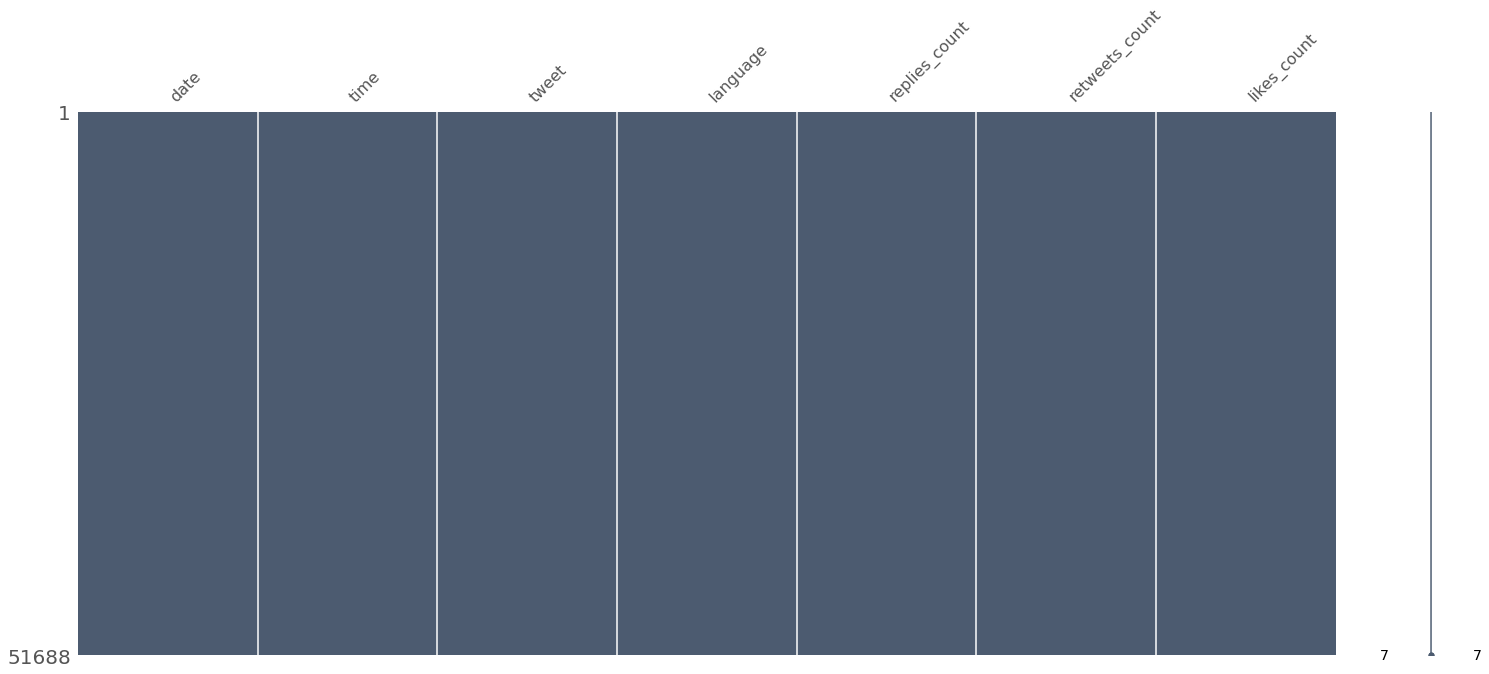

In [55]:
import missingno as msno
msno.matrix(dfking,color=(0.3,0.36,0.44))

# <font color='red'> Filtrando os Tweets de Lingua Inglesa </font>

In [56]:
dfkingEn = dfking[(dfking.language == 'en')]

In [57]:
dfkingEn.shape

(47500, 7)

## Filtrando as palavras irrelevantes mas comuns nos tweets

In [58]:
def create_corpusKing(target):
    corpus=[]
    
    for x in dfking[dfking['language']==target ]['tweet'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [59]:
np.array(stop)

array({'because', 'his', 'there', 'with', 'in', 'under', "you'd", "hasn't", 'than', 'shan', 'herself', "should've", 'off', 'being', 'we', 'nor', 'out', 'once', 'are', 'for', 'most', 'weren', 'o', 'about', 're', 'have', 'only', 'had', 've', 'to', 'just', "wouldn't", 'don', 'too', 'am', "needn't", "didn't", "shouldn't", 'any', 'each', 'other', 'some', 'didn', 'him', 'hadn', 'it', 'she', 'yourselves', 'is', 'here', 'wasn', "she's", 'needn', 'below', 'doing', 'll', 'them', 'aren', 'on', 'these', 'yours', "wasn't", 'theirs', 'of', "shan't", 'couldn', 'your', 'own', 'ourselves', "aren't", 'above', 'd', "doesn't", "haven't", 'did', 'were', 'few', 'itself', "mustn't", 'those', 'that', "that'll", 'before', 'mustn', 'as', 'themselves', 'or', 'which', 'you', 'doesn', "won't", 'our', "couldn't", 'during', 'while', 'from', "isn't", 'more', 'between', "hadn't", "you've", 'why', 'until', 'shouldn', 'he', 'do', 'hers', 'but', 'been', 'down', 'all', 'm', 'haven', 'won', 'then', 'her', 'should', 'their'

<BarContainer object of 10 artists>

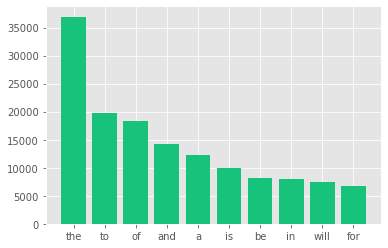

In [60]:
corpusKing=create_corpusKing("en")

dic=defaultdict(int)
for word in corpusKing:
    if word in stop:
        dic[word]+=1     
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y, color='#17C37B')

## Filtrando as pontuações mas comuns nos tweets

<BarContainer object of 26 artists>

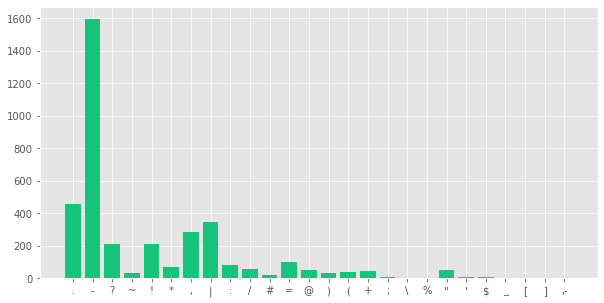

In [61]:
plt.figure(figsize=(10,5))
corpusKing=create_corpusKing("en")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpusKing):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='#17C37B')

## Filtrando as palavras mas comuns nos tweets

In [62]:
counter=Counter(corpusKing)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

<AxesSubplot:>

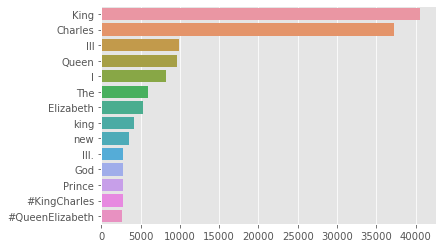

In [63]:
sns.barplot(x=y,y=x)

#  Pre-processamento e Limpeza 

### Removendo as Urls e links HTML

In [64]:
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)
dfkingEn['tweet_new']=dfkingEn['tweet'].apply(lambda x:remove_urls(x))

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
dfkingEn['tweet']=dfkingEn['tweet_new'].apply(lambda x:remove_html(x))

### Convertendo os tweets para letras minusculas e Removendo os numeros

In [65]:
def lower(text):
    low_text= text.lower()
    return low_text
dfkingEn['tweet_new']=dfkingEn['tweet'].apply(lambda x:lower(x))



def remove_num(text):
    remove= re.sub(r'\d+', '', text)
    return remove
dfkingEn['tweet']=dfkingEn['tweet_new'].apply(lambda x:remove_num(x))

### Removendo as stopwords e pontuações

In [66]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

def punct_remove(text):
    punct = re.sub(r"[^\w\s\d]","", text)
    return punct
dfkingEn['tweet_new']=dfkingEn['tweet'].apply(lambda x:punct_remove(x))



def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dfkingEn['tweet']=dfkingEn['tweet_new'].apply(lambda x:remove_stopwords(x))

### Removendo as Menções  e hashtags

In [67]:
def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text
dfkingEn['tweet_new']=dfkingEn['tweet'].apply(lambda x:remove_mention(x))
def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text
dfkingEn['tweet']=dfkingEn['tweet_new'].apply(lambda x:remove_hash(x))

### Removendo o espaço em branco deixado apos a remoção dos palavras irrelevantes, pontuações(….)

In [68]:
def remove_space(text):
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove
dfkingEn['tweet_new']=dfkingEn['tweet'].apply(lambda x:remove_space(x))

dfkingEn = dfkingEn.drop(columns=['tweet_new'])

### Exibindo a Tabela Processada 

In [69]:
dfkingEn.head(5)

,date,time,tweet,language,replies_count,retweets_count,likes_count
0,2022-09-09,02:57:51,andylines god supports ascension king charles ...,en,0,0,0
3,2022-09-09,02:57:36,funny think uk tabloids keep repeating prince ...,en,1,0,0
4,2022-09-09,02:57:32,based led zeppelin scale king charles iii folk...,en,0,1,0
5,2022-09-09,02:57:29,theroyalbutler king charles ii alright,en,0,0,0
6,2022-09-09,02:57:29,king charles iii gotten know well great wonder...,en,0,0,0


## Palavras mas usadas pelos Usuarios

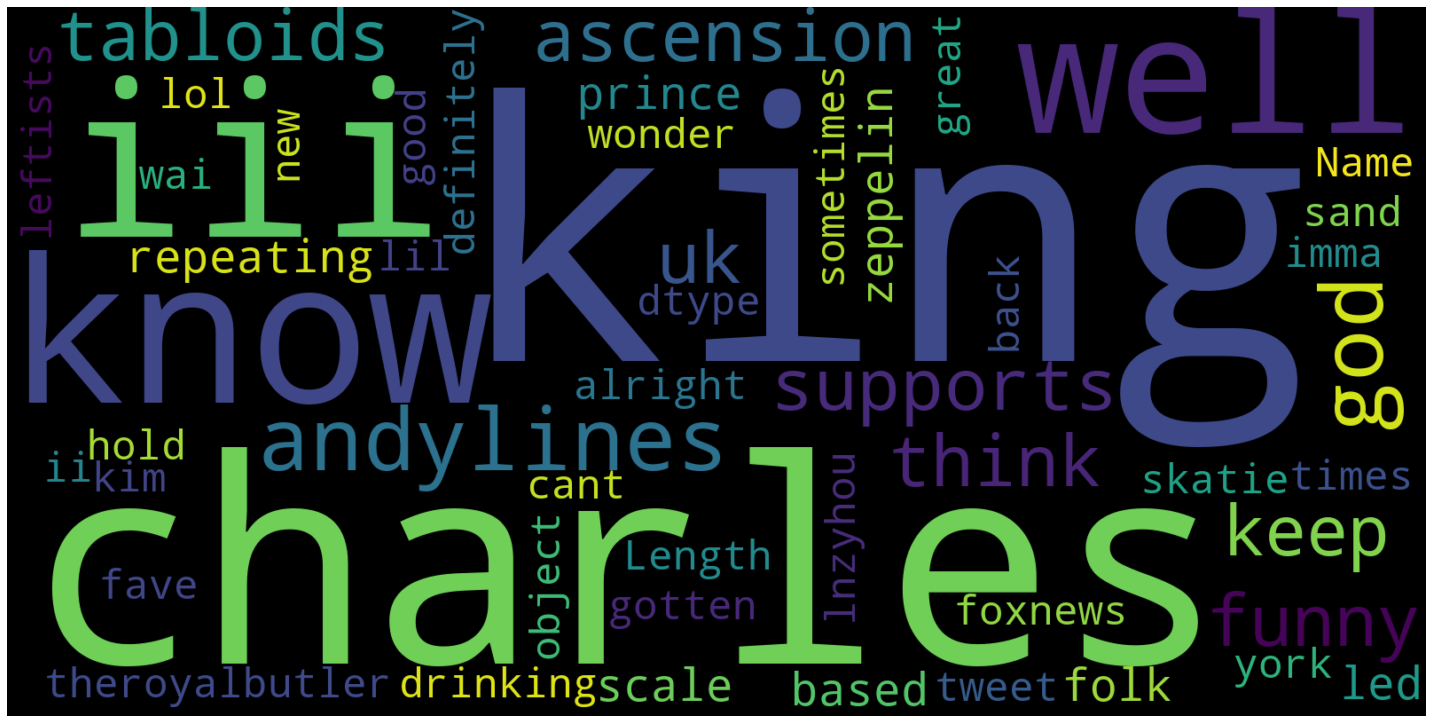

In [70]:
text = str(dfkingEn['tweet'])
plt.figure(figsize = (20,20))
wc = WordCloud(min_font_size = 3, width = 1600 , height = 800 )
wc.generate(text)
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off');
plt.tight_layout()  

## Top 15 Reações Apos o Anúncio da Morte da Rainha Elisabeth II

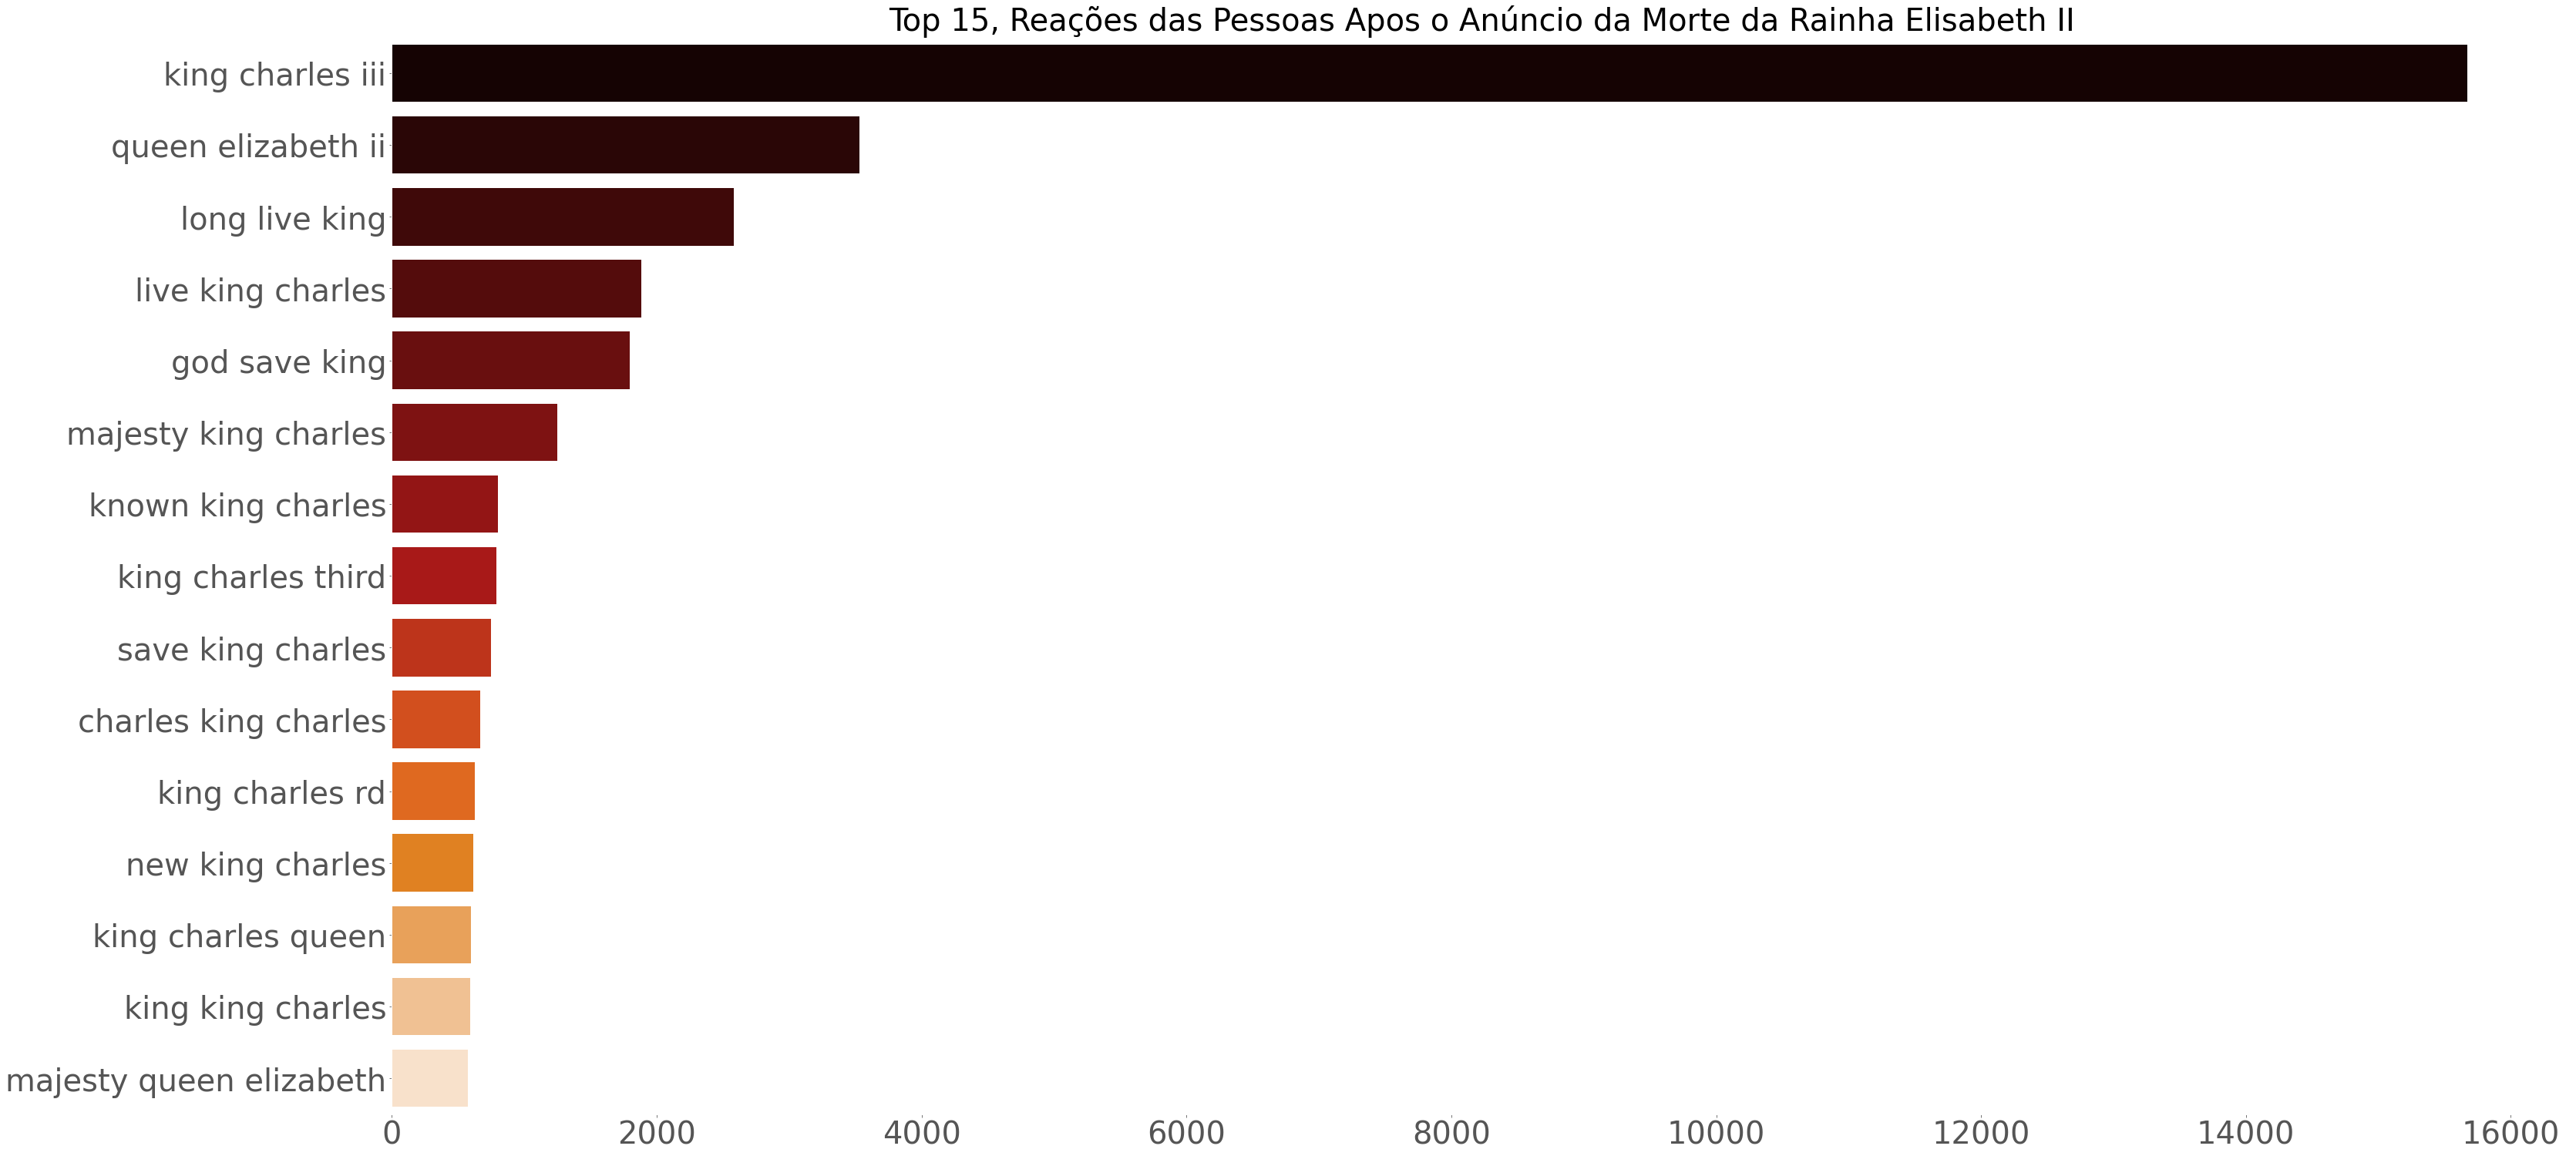

In [71]:
# Define functions
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 15




sentimento = defaultdict(int)



# Unigrams
for tweet in dfkingEn['tweet']:
    for word in generate_ngrams(tweet, n_gram=3):
        sentimento[word] += 1
        

        
df_sentimento = pd.DataFrame(sorted(sentimento.items(), key=lambda x: x[1])[::-1])



fig, axes = plt.subplots(figsize=(40, 20))
plt.tight_layout()

sns.barplot(y=df_sentimento[0].values[:N], x=df_sentimento[1].values[:N], palette = 'gist_heat')


axes.spines['right'].set_visible(False)
axes.set_xlabel('')
axes.set_ylabel('')
axes.tick_params(axis='x', labelsize=40)
axes.tick_params(axis='y', labelsize=40)
axes.set_facecolor('white')
axes.set_title(f'Top {N}, Reações das Pessoas Apos o Anúncio da Morte da Rainha Elisabeth II', fontsize=40)


plt.show()

# <font color='green'> Filtrando os Tweets de Lingua Portuguesa </font>

In [72]:
dfkingPt = dfking[(dfking.language == 'pt')]

In [73]:
dfkingPt.shape

(245, 7)

#  Pre-processamento e Limpeza 

### Removendo as Urls e links HTML

In [74]:
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)
dfkingPt['tweet_new']=dfkingPt['tweet'].apply(lambda x:remove_urls(x))

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
dfkingPt['tweet']=dfkingPt['tweet_new'].apply(lambda x:remove_html(x))

### Convertendo os tweets para letras minusculas e Removendo os numeros

In [75]:
def lower(text):
    low_text= text.lower()
    return low_text
dfkingPt['tweet_new']=dfkingPt['tweet'].apply(lambda x:lower(x))



def remove_num(text):
    remove= re.sub(r'\d+', '', text)
    return remove
dfkingPt['tweet']=dfkingPt['tweet_new'].apply(lambda x:remove_num(x))

### Removendo as stopwords e pontuações

In [76]:
from nltk.corpus import stopwords
", ".join(stopwords.words('portuguese'))
STOPWORDS = set(stopwords.words('portuguese'))

def punct_remove(text):
    punct = re.sub(r"[^\w\s\d]","", text)
    return punct
dfkingPt['tweet_new']=dfkingPt['tweet'].apply(lambda x:punct_remove(x))



def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dfkingPt['tweet']=dfkingPt['tweet_new'].apply(lambda x:remove_stopwords(x))

### Removendo as Menções  e hashtags

In [77]:
def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text
dfkingPt['tweet_new']=dfkingPt['tweet'].apply(lambda x:remove_mention(x))

def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text
dfkingPt['tweet']=dfkingPt['tweet_new'].apply(lambda x:remove_hash(x))

### Removendo o espaço em branco deixado apos a remoção dos palavras irrelevantes, pontuações(….)

In [78]:
def remove_space(text):
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove
dfkingPt['tweet_new']=dfkingPt['tweet'].apply(lambda x:remove_space(x))

dfkingPt = dfkingPt.drop(columns=['tweet_new'])

### Exibindo a Tabela Processada 

In [79]:
dfkingPt.head(5)

,date,time,tweet,language,replies_count,retweets_count,likes_count
360,2022-09-09,02:44:23,joguei king charles google primeiro resultado ...,pt,0,0,0
1392,2022-09-09,02:06:32,amo jogar king charles google aparece foto dog...,pt,0,0,0
1456,2022-09-09,02:04:12,robinson castro abre tela computador fica olha...,pt,1,0,1
1667,2022-09-09,01:57:01,jairbolsonaro rosemovio agora god save the kin...,pt,0,0,0
1805,2022-09-09,01:52:13,mãos king charles the third inchadas grávida c...,pt,0,0,0


##  Palavras mas usadas pelos Usuarios

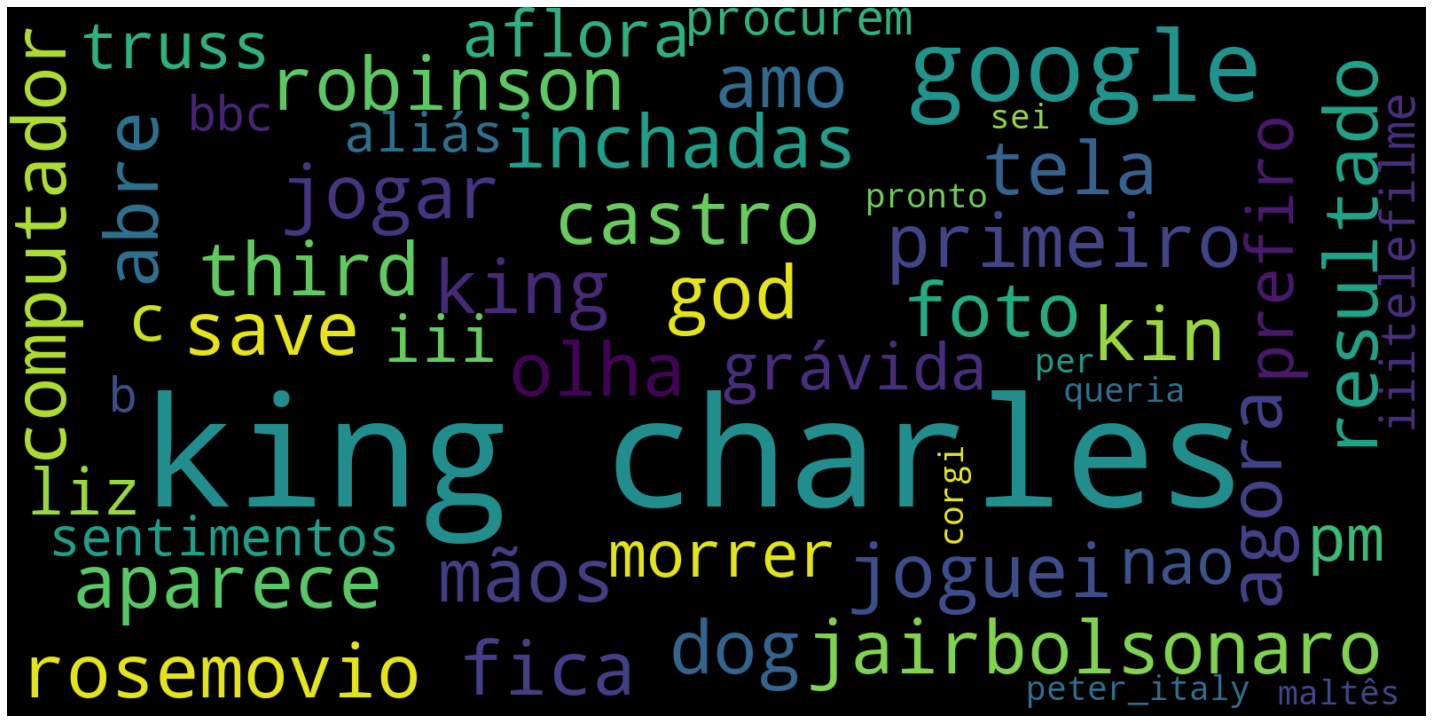

In [80]:
textpt= str(dfkingPt['tweet']) 
plt.figure(figsize = (20,20))
wc = WordCloud(min_font_size = 3,  max_words = 50 , width = 1600 , height = 800 )
wc.generate(textpt)
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off');
plt.tight_layout()

## Top 15 Reações Apos o Anúncio da Morte da Rainha Elisabeth II

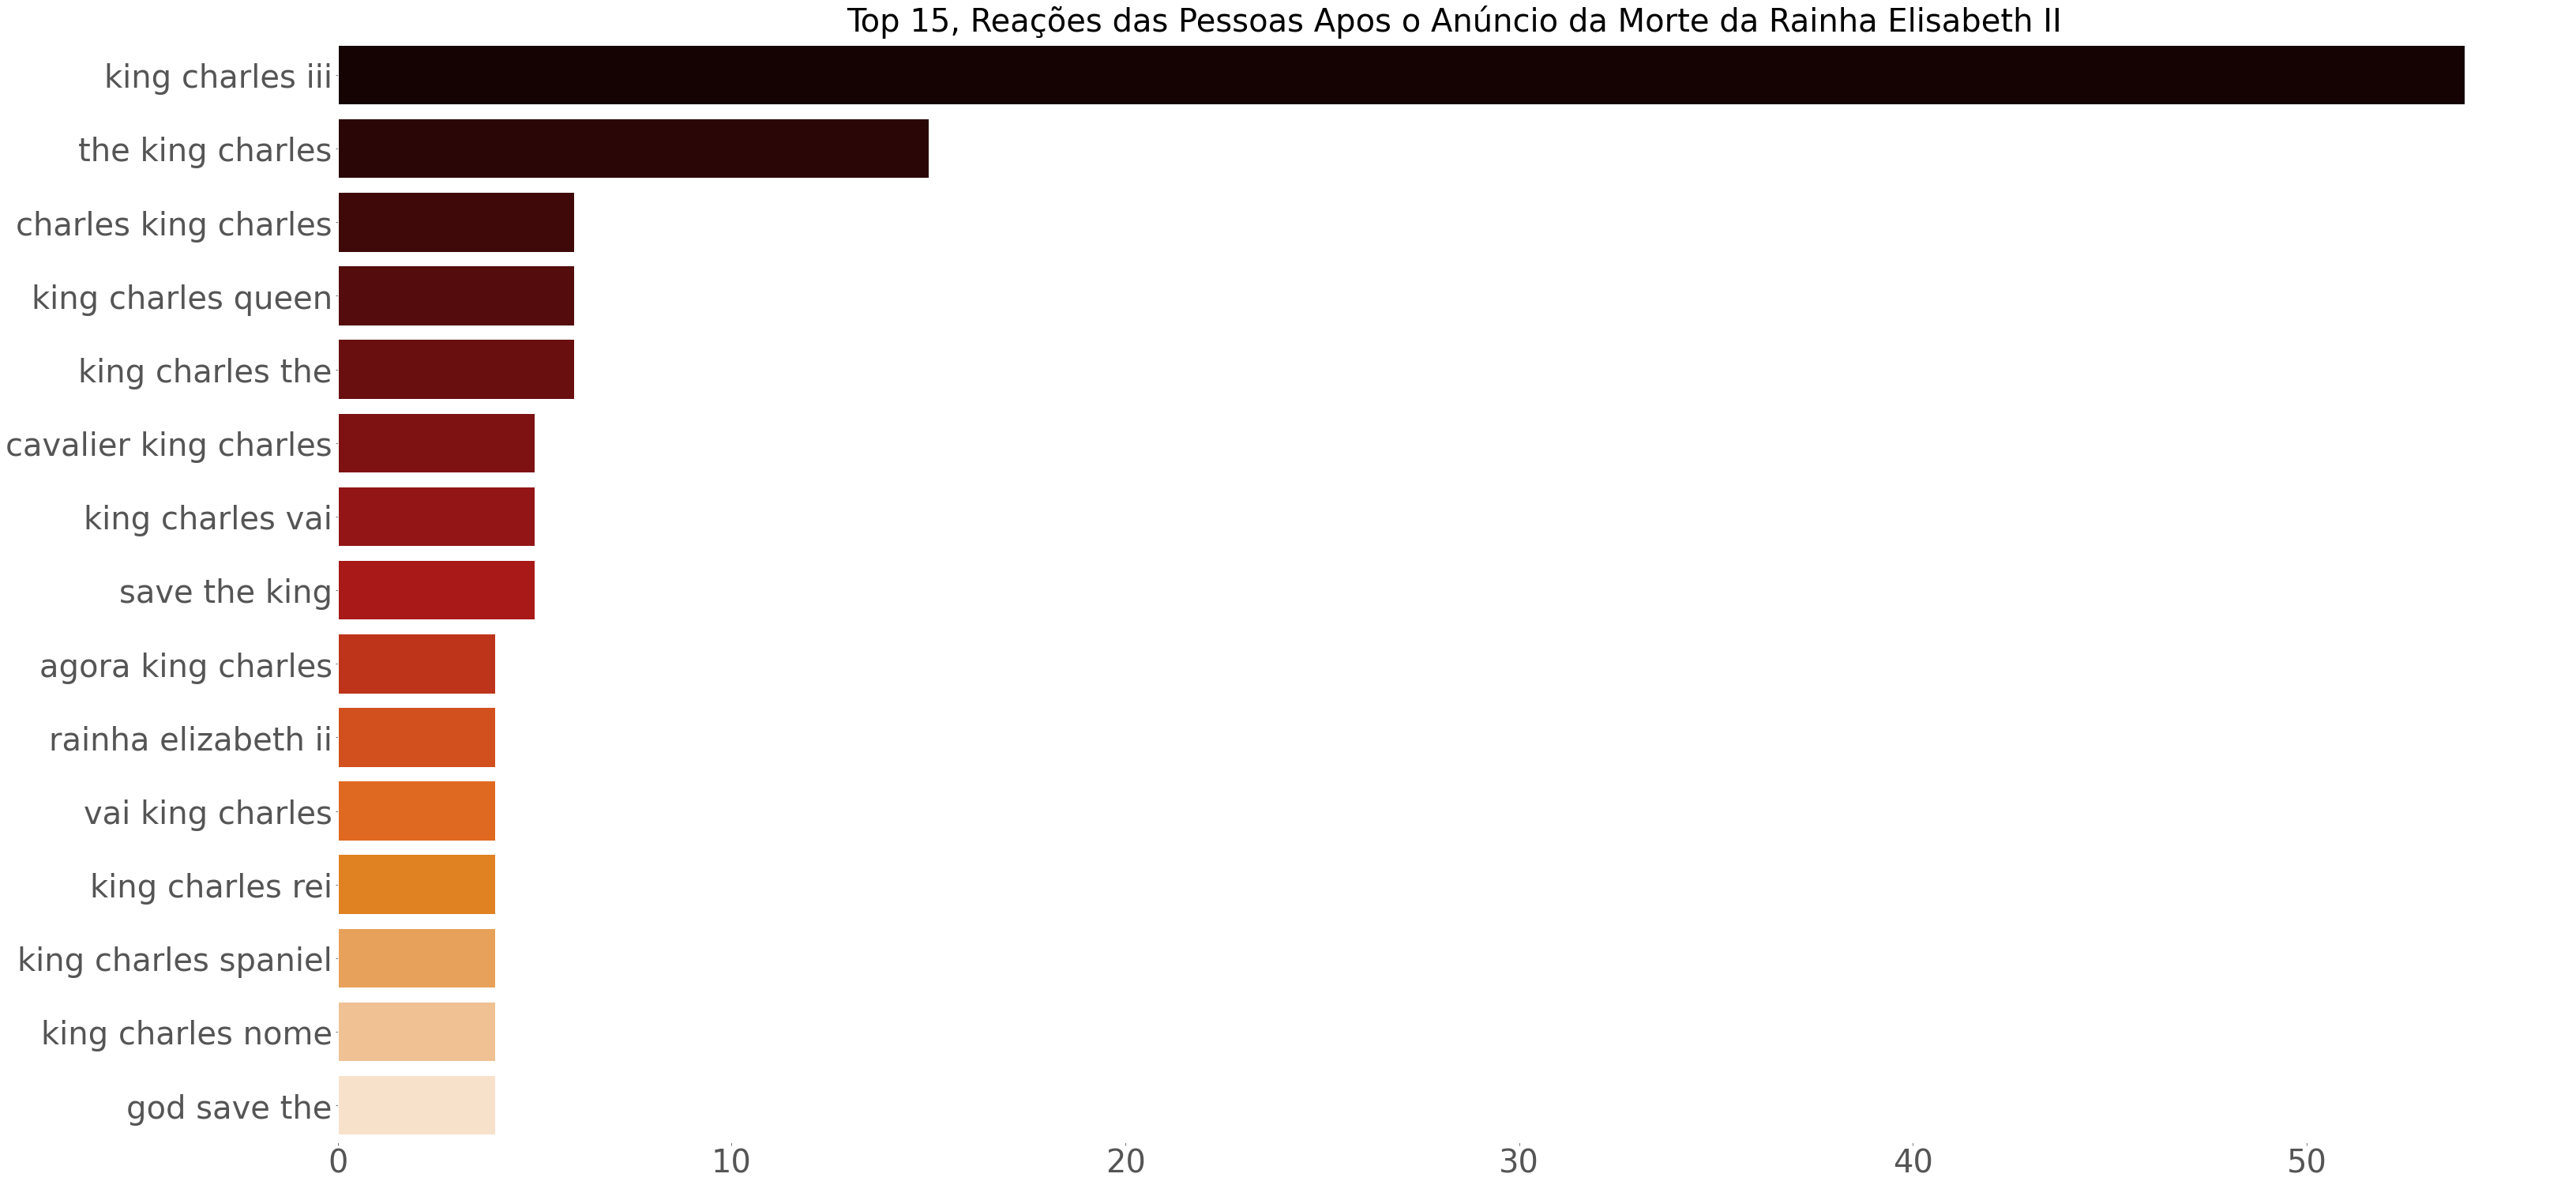

In [81]:
# Define functions
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 15




sentimento = defaultdict(int)



# Unigrams
for tweet in dfkingPt['tweet']:
    for word in generate_ngrams(tweet, n_gram=3):
        sentimento[word] += 1
        

        
df_sentimento = pd.DataFrame(sorted(sentimento.items(), key=lambda x: x[1])[::-1])



fig, axes = plt.subplots(figsize=(40, 20))
plt.tight_layout()

sns.barplot(y=df_sentimento[0].values[:N], x=df_sentimento[1].values[:N], palette = 'gist_heat')


axes.spines['right'].set_visible(False)
axes.set_xlabel('')
axes.set_ylabel('')
axes.tick_params(axis='x', labelsize=40)
axes.tick_params(axis='y', labelsize=40)
axes.set_facecolor('white')

axes.set_title(f'Top {N}, Reações das Pessoas Apos o Anúncio da Morte da Rainha Elisabeth II', fontsize=40)


plt.show()